## Individual Project : Revised Version
## By : Saloni Sharma 



## Graph 3 : 
####  Mass Shootings : Increase in mass shootings since the Sandy Hook incident in Dec 2012

In [2]:
#Importing the original dataset for firearms and homicides
import pandas as pd




df_2014=pd.read_csv("mass2014.csv")
df_2015=pd.read_csv("mass2015.csv")
df_2016=pd.read_csv("mass2016.csv")
df_2017=pd.read_csv("mass2017.csv")
df_2018=pd.read_csv("mass2018.csv")

#merging the datasets together
df_mass_shooting=df_2014.append([df_2015,df_2016,df_2017,df_2018])
df_mass_shooting.head(5)


,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 29, 2014",Louisiana,New Orleans,Poydras and Bolivar,0,4,NaN
1,"December 27, 2014",California,Los Angeles,8800 block of South Figueroa Street,1,3,NaN
2,"December 27, 2014",California,Sacramento,4000 block of May Street,0,4,NaN
3,"December 26, 2014",Illinois,East St. Louis,2500 block of Summit Avenue,1,3,NaN
4,"December 24, 2014",Missouri,Saint Louis,18th and Pine,1,3,NaN


In [3]:
#checking for nulls
df_mass_shooting.isnull().sum()

Incident Date        0
State                0
City Or County       0
Address             11
# Killed             0
# Injured            0
Operations        1412
dtype: int64

In [4]:
#Operations column is filled with nulls, hence removing it completely.
#The address column is not necessary for the analysis , hence removing it 
df_mass_shooting.drop(['Address','Operations'],axis=1,inplace=True)

In [5]:
df_mass_shooting.isnull().sum()#all nulls are removed

Incident Date     0
State             0
City Or County    0
# Killed          0
# Injured         0
dtype: int64

In [6]:
#renaming the #Killed and #Injured columns to "Killed" and "Injured" respectively

df_mass_shooting.rename(columns={'# Killed':'Killed', '# Injured':'Injured'},inplace=True)
df_mass_shooting.head(5)

,Incident Date,State,City Or County,Killed,Injured
0,"December 29, 2014",Louisiana,New Orleans,0,4
1,"December 27, 2014",California,Los Angeles,1,3
2,"December 27, 2014",California,Sacramento,0,4
3,"December 26, 2014",Illinois,East St. Louis,1,3
4,"December 24, 2014",Missouri,Saint Louis,1,3


In [7]:
#in order to see how many people , in total were affected by the shooting, let us combine the killed and the inmjured columns
df_mass_affected=df_mass_shooting.copy()
df_mass_affected['Affected']=df_mass_affected['Killed']+df_mass_affected['Injured']
df_mass_affected.head(5)

,Incident Date,State,City Or County,Killed,Injured,Affected
0,"December 29, 2014",Louisiana,New Orleans,0,4,4
1,"December 27, 2014",California,Los Angeles,1,3,4
2,"December 27, 2014",California,Sacramento,0,4,4
3,"December 26, 2014",Illinois,East St. Louis,1,3,4
4,"December 24, 2014",Missouri,Saint Louis,1,3,4


### To develop the Redesign Visual:

In [17]:
##calculating just the number of mass shootings in 2014 and 2017 
df_num_2014=df_mass_2014.groupby('State').agg({'2014':'count'}).reset_index()
df_num_2017=df_mass_2017.groupby('State').agg({'2017':'count'}).reset_index()
df_numofshooting=df_num_2014.merge(df_num_2017,on='State')
df_numofshooting.head()

,State,2014,2017
0,Alabama,2,7
1,Arizona,1,5
2,Arkansas,2,3
3,California,43,37
4,Colorado,2,2


In [18]:
df_numofshooting.to_csv("countofshooting.csv",index=False)

In [19]:
## calculating average number of shooting in 2014 and 2017 , \
#selecting states with number of shootings above that average, and then saving it to csv
avg_14=df_numofshooting['2014'].mean()
avg_17=df_numofshooting['2017'].mean()
df_numshoot_avg=df_numofshooting[(df_numofshooting['2014']>avg_14) & (df_numofshooting['2017']>avg_17)]
df_numshoot_avg
df_numshoot_avg.to_csv("numshooting_avg.csv")

In [20]:
##counting total number of shootings in 2014 and 2017

import numpy as np
import pandas as pd

len_2014=len(df_mass_2014)
len_2017=len(df_mass_2017)
Number=pd.DataFrame(columns=['Year','Number of shootings'])
rows = [[2014,len_2014],[2017,len_2017]]
for row in rows:
    Number.loc[len(Number)] = row
print(Number)
Number.to_csv('number_year.csv')

   Year Number of shootings
0  2014                 270
1  2017                 346


In [21]:
##it can clearly be seen that the number of mass shootings in 2017 is far greater than that in 2014.

In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


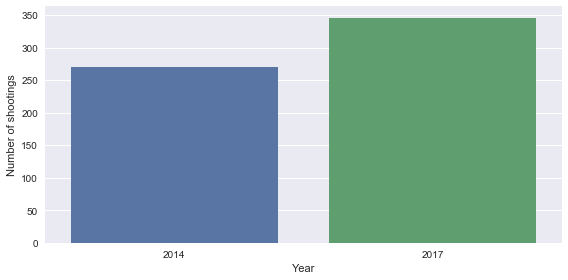

In [25]:
sns.factorplot(x='Year',y='Number of shootings', data=Number,kind='bar',aspect=2)

### The above graph is my final version for the redesign portion 

## To develop the Deceptive Visual : 

For the deception version of the dataset, I would like to explore: The average number of affected people in 2014 and 2017, get the list of locations above the average , and try to plot the common locations and see the changes in the number of affected people 

How does the 'affected' number of people change from 2014 to 2017? 

Getting only the incidents that happened in 2014 and 2017 in df_mass_2014 and df_mass_2017: 

Adding 2 new columns : 2014 and 2017. These columns will have a '1' if the Incident Date has either '2014' or '2017' in it respectively, and '0' otherwise.

In [8]:
df_mass_affected['2014'] = df_mass_affected['Incident Date'].apply(lambda x: 1 if '2014' in x else 0)
df_mass_affected['2017']= df_mass_affected['Incident Date'].apply(lambda x: 1 if '2017' in x else 0)
df_mass_affected.head(5)

,Incident Date,State,City Or County,Killed,Injured,Affected,2014,2017
0,"December 29, 2014",Louisiana,New Orleans,0,4,4,1,0
1,"December 27, 2014",California,Los Angeles,1,3,4,1,0
2,"December 27, 2014",California,Sacramento,0,4,4,1,0
3,"December 26, 2014",Illinois,East St. Louis,1,3,4,1,0
4,"December 24, 2014",Missouri,Saint Louis,1,3,4,1,0


Collecting two separate dataframes for dates of events that happened in 2014 and 2017.

In [9]:
df_mass_2014=df_mass_affected[df_mass_affected['2014']==1]
df_mass_2017=df_mass_affected[df_mass_affected['2017']==1]


In [10]:
## merging the two datasets by state
df_mass_comb=df_mass_2017.merge(df_mass_2014,on="State")
df_mass_comb.head(5)

,Incident Date_x,State,City Or County_x,Killed_x,Injured_x,Affected_x,2014_x,2017_x,Incident Date_y,City Or County_y,Killed_y,Injured_y,Affected_y,2014_y,2017_y
0,"December 31, 2017",Colorado,Littleton (Highlands Ranch),2,6,8,0,1,"November 23, 2014",Denver,1,4,5,1,0
1,"December 31, 2017",Colorado,Littleton (Highlands Ranch),2,6,8,0,1,"May 4, 2014",Wheat Ridge,0,4,4,1,0
2,"January 15, 2017",Colorado,Capulin,3,1,4,0,1,"November 23, 2014",Denver,1,4,5,1,0
3,"January 15, 2017",Colorado,Capulin,3,1,4,0,1,"May 4, 2014",Wheat Ridge,0,4,4,1,0
4,"December 31, 2017",Illinois,Chicago,0,4,4,0,1,"December 26, 2014",East St. Louis,1,3,4,1,0


In [11]:
#removing unwanted columns
df_mass_comb.drop(['City Or County_x','Killed_x','Injured_x','2014_x','2017_x','City Or County_y',\
                   'Killed_y','Injured_y','2014_y','2017_y'], axis=1,inplace=True)


#renaming the columns 
df_mass_comb.rename(columns={'Incident Date_x':'Incident_2017','Affected_x':'Affected_2017','Incident Date_y':'Incident_2014',\
                             'Affected_y':'Affected_2014'}, inplace=True)
df_mass_comb.head(5)

,Incident_2017,State,Affected_2017,Incident_2014,Affected_2014
0,"December 31, 2017",Colorado,8,"November 23, 2014",5
1,"December 31, 2017",Colorado,8,"May 4, 2014",4
2,"January 15, 2017",Colorado,4,"November 23, 2014",5
3,"January 15, 2017",Colorado,4,"May 4, 2014",4
4,"December 31, 2017",Illinois,4,"December 26, 2014",4


In [12]:
#getting total number of affected people in each year by the state:
df_mass_comb2=df_mass_comb.groupby('State')['Affected_2014','Affected_2017'].sum().reset_index()
df_mass_comb2.head(5)

,State,Affected_2014,Affected_2017
0,Alabama,70,88
1,Arizona,20,20
2,Arkansas,36,74
3,California,7881,7955
4,Colorado,18,24


 Calculating the average number of affected people in 2014 and 2017, getting the list of locations above the average , and trying to plot the common locations and see the changes in the number of affected people 

In [13]:
#trying to find the average number of people who have been affected by the mass shootings in 2014 and 2017 

df_mass_comb2['Affected_2014'].mean()

699.2

In [14]:
df_mass_comb2['Affected_2017'].mean()

751.8571428571429

In [15]:
#keeping all rows above the avergae values
df_mass_comb3=df_mass_comb2[(df_mass_comb2['Affected_2014']>699) & (df_mass_comb2['Affected_2017']>751)]
df_mass_comb3

,State,Affected_2014,Affected_2017
3,California,7881,7955
7,Florida,2184,1952
8,Georgia,765,765
9,Illinois,4608,4498
12,Louisiana,900,759
23,New York,780,840
29,Tennessee,854,910
30,Texas,1980,2100


In [16]:
#exporting to csv
df_mass_comb3.to_csv("mass_deception2.csv")